In [83]:
# Import Libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Read data
path = '01 - Data/ecom customer_data.xlsx'

In [2]:
# Read Data into a DataFrame
df = pd.read_excel(path)

In [3]:
# ------------------------------------------------------------------
# HANDLE NULLS IN THE GENDER COLUMN
# ------------------------------------------------------------------

# Fill NULLS in this new copy with new values
df['Gender'] = df['Gender'].fillna('No Gender')

# Check Unique Values in the Gender Column
df['Gender'].unique()

# Check for NULL Values
# df.isnull().sum()

array(['M', 'F', 'No Gender'], dtype=object)

<Axes: >

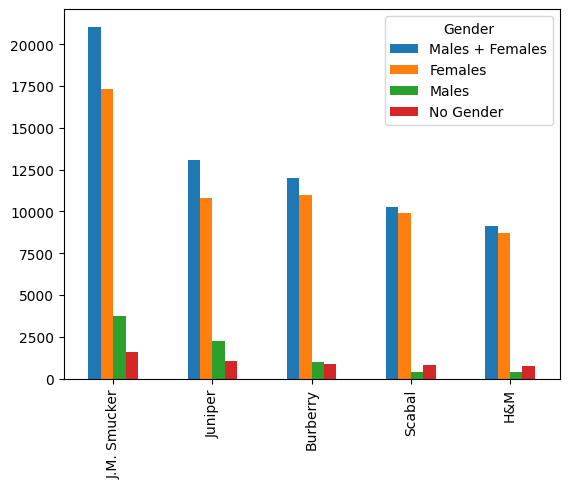

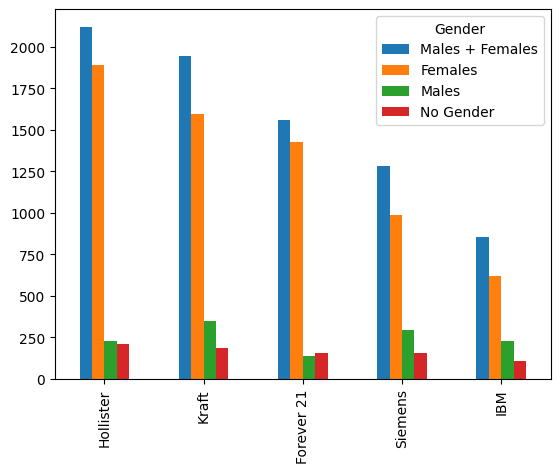

In [72]:
# ------------------------------------------------------------------
# TRANSPOSE THE DF INTO NEW COLUMNS
# ------------------------------------------------------------------

# Make a copy of the DF
df_t = df.copy()

# Group the Data by the unique values in Gender Column
# Then Aggregate the result by the sum of each occurance
df_t = df_t.groupby('Gender').sum()

# Transpose the DF
df_t = df_t.T

# New column as a sum of Males and Females
df_t['Males + Females'] = df_t['M'] + df_t['F']

# Rename and Rearrange columns
cols = {'F' : 'Females', 'M' : 'Males'}
df_t.rename(columns = cols, inplace = True)
df_t = df_t[['Males + Females', 'Females', 'Males', 'No Gender']]

# Sort Values from Highest to Lowest
df_t = df_t.sort_values(by = 'Males + Females', ascending = False)

# Plot the Top and Bottom 5 
df_t[2:7].plot.bar()
df_t[-5:].plot.bar()

From the Bar chart arranged from the Highest to Lowest, The top 5 comapnies with the leading Market share are J.M. Smucker, Juniper, Burberry, Scabal and H&M.

Hollister, Kraft, Forever 21, Siemens and IBM are the bottom 5 comapanies in terms of trailing market share

Females are the leading in orders followed by men and lastly those who did not disclose their gender.

In [ ]:
df2 = df.copy()

ord_enc = OrdinalEncoder()
df2 = ord_enc.fit_transform(df[['Gender']])
df2 = pd.DataFrame(df2, columns = ['Gender_Cat'])
df = pd.concat([df, df2], axis = 0)
df

In [101]:
type(df2)

numpy.ndarray